# [spooky-author-identification](https://www.kaggle.com/c/spooky-author-identification)

In [1]:
!pip install torchtext

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
#!kaggle competitions download -c spooky-author-identification

In [4]:
#!unzip spooky-author-identification.zip

In [5]:
#!unzip train.zip
#!unzip test.zip

In [6]:
import pandas as pd

df_train = pd.read_csv('train.csv')

In [7]:
df_train.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [8]:
df_train.describe()

,id,text,author
count,19579,19579,19579
unique,19579,19579,3
top,id26305,"This process, however, afforded me no means of...",EAP
freq,1,1,7900


In [9]:
n = 200
row = df_train.iloc[200]
print(row.id, row.author)
print(row.text)

id15797 HPL
He also cut timber and began to repair the unused parts of his house a spacious, peaked roofed affair whose rear end was buried entirely in the rocky hillside, and whose three least ruined ground floor rooms had always been sufficient for himself and his daughter.


In [10]:
import os
import random
import numpy as np
import torch
import torchvision

In [11]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(42)

In [12]:
%matplotlib inline

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

In [13]:
import pandas as pd
import torch
from torchtext.vocab import build_vocab_from_iterator
from torch.utils.data import Dataset, DataLoader
from typing import List, Tuple

class SpookyAuthorDataset(Dataset):
    def __init__(self, df: pd.DataFrame, text_vocab, author_vocab):
        self.df = df
        self.text_vocab = text_vocab
        self.author_vocab = author_vocab

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        item  =self.df.iloc[idx]
        return {
            'id': item['id'],
            'text': torch.tensor([self.text_vocab[token] for token in item['text'].split()]),
            'author': torch.tensor(self.author_vocab[item['author']])
        }

/home/ubuntu/.local/lib/python3.10/site-packages/torchtext/vocab/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/home/ubuntu/.local/lib/python3.10/site-packages/torchtext/utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)


In [14]:
def yield_tokens(data_iter: pd.Series) -> List[str]:
    for text in data_iter:
        yield text.split()

In [15]:
def yield_category(data_iter: pd.Series) -> List[str]:
    for category in data_iter:
        yield [category] 

In [16]:
text_vocab = build_vocab_from_iterator(yield_tokens(df_train['text']), specials=['<unk>'])
text_vocab.set_default_index(text_vocab['<unk>'])

author_vocab = build_vocab_from_iterator(yield_category(df_train['author']), specials=['<unk>'])
author_vocab.set_default_index(author_vocab['<unk>'])

In [17]:
df_train = pd.read_csv('train.csv')

In [18]:
from torch.utils.data import random_split

dataset = SpookyAuthorDataset(df_train, text_vocab, author_vocab)
total_size = len(dataset)
train_size = int(0.7 * total_size)
test_size = total_size - train_size
train_data, test_data = random_split(dataset, [train_size, test_size])

In [19]:
print('훈련 샘플의 개수 : {}'.format(len(train_data)))
print('테스트 샘플의 개수 : {}'.format(len(test_data)))

훈련 샘플의 개수 : 13705
테스트 샘플의 개수 : 5874


In [20]:
print(train_data[0])

{'id': 'id09741', 'text': tensor([ 340,  134,    5,   11,    6,  795,  464,    7,   18,    5,  541,   10,
        4910,  164,    1, 1805]), 'author': tensor(3)}


In [21]:
print('단어 집합의 크기 : {}'.format(len(text_vocab)))

단어 집합의 크기 : 47557


In [22]:
print(text_vocab.get_stoi())

{'Οἶδα': 47556, 'émeutes,': 47555, 'élite': 47554, "ædile's": 47550, 'Æschylus;': 47548, 'Æneid,': 47547, 'Ångstrom.': 47545, 'zubmizzion': 47544, 'zorry.': 47543, 'zircon': 47541, 'zide."': 47539, 'zest.': 47538, 'zest,': 47537, 'zenith': 47535, 'zee,"': 47534, 'zealous': 47533, 'zeal,': 47531, 'zay,"': 47530, 'zay,': 47529, 'yourzelf."': 47526, 'yourself,"': 47524, 'yours.': 47523, "your's": 47522, 'younguns': 47521, 'youngster': 47520, 'younger;': 47519, "you?'": 47518, 'yore.': 47515, 'yield.': 47513, 'yew,': 47511, 'yet,"': 47509, 'yesterday;': 47507, 'yes."': 47504, 'yeoman,': 47503, 'yelpings': 47502, 'yellow.': 47500, 'yeller': 47499, 'yearns': 47495, 'yearnings': 47494, 'yearn': 47493, "year's": 47492, "year'.": 47491, 'ye?"': 47490, "ye'd": 47487, 'yawn': 47485, 'yahaah': 47482, "yacht's": 47481, "y'hah;": 47480, 'xwns': 47479, 'xut?': 47476, 'xr': 47475, 'xdixus': 47473, "wxn't?": 47471, 'wust,': 47470, 'wust"': 47469, "wuss'n": 47468, "wudn't": 47467, 'wrong;': 47463, 'writ

In [23]:
print(text_vocab.get_itos())

['<unk>', 'the', 'of', 'and', 'to', 'I', 'a', 'in', 'was', 'that', 'my', 'had', 'with', 'his', 'as', 'he', 'it', 'for', 'which', 'not', 'at', 'from', 'by', 'is', 'but', 'on', 'be', 'The', 'were', 'have', 'me', 'this', 'her', 'all', 'or', 'an', 'no', 'you', 'so', 'been', 'one', 'we', 'upon', 'could', 'its', 'would', 'when', 'they', 'their', 'more', 'him', 'some', 'she', 'into', 'than', 'our', 'are', 'now', 'very', 'It', 'there', 'He', 'what', 'will', 'who', 'only', 'if', 'up', 'any', 'about', 'did', 'even', 'these', 'your', 'out', 'But', 'might', 'before', 'In', 'them', 'must', 'like', 'most', 'first', 'through', 'over', 'should', 'seemed', 'yet', 'made', 'old', 'never', 'every', 'time', 'such', 'found', 'then', 'after', 'those', 'has', 'little', 'man', 'other', 'said', 'me,', 'saw', 'where', 'still', 'great', 'And', 'while', 'long', 'many', 'own', 'do', 'much', 'came', 'may', 'can', 'us', 'whose', 'This', 'two', 'down', 'well', 'We', 'eyes', 'am', 'ever', 'thought', 'being', 'without',

In [24]:
print(author_vocab.get_stoi())

{'HPL': 3, 'MWS': 2, 'EAP': 1, '<unk>': 0}


In [25]:
print(author_vocab.get_itos())

['<unk>', 'EAP', 'MWS', 'HPL']


In [26]:
batch_size = 5

In [27]:
def collate_batch(batch):
    label_list, text_list = [], []
    for item in batch:
        label_list.append(item['author'])
        text_list.append(item['text'])
    
    text_list = torch.nn.utils.rnn.pad_sequence(text_list, batch_first=True, padding_value=text_vocab['<pad>'])
    label_list = torch.tensor(label_list, dtype=torch.int64)
    return text_list, label_list


In [28]:
train_loader = DataLoader(dataset=train_data, batch_size = batch_size, shuffle=True, collate_fn=collate_batch)
test_loader = DataLoader(dataset=test_data, batch_size = batch_size, shuffle=True, collate_fn=collate_batch)

In [29]:
print('훈련 데이터의 미니 배치 수 : {}'.format(len(train_loader)))
print('테스트 데이터의 미니 배치 수 : {}'.format(len(test_loader)))

훈련 데이터의 미니 배치 수 : 2741
테스트 데이터의 미니 배치 수 : 1175


In [30]:
for text, author in train_loader:
    print(text)
    print(author)
    break

tensor([[   27,    65, 14975,   673,    16,   128, 13835,     8,     1,   370,
         14249,  1514,    21,     1,  2346,     2,     1,  2152, 40971,     3,
            31, 14249,   809,     1,  1020,   898,    46,     1, 12189,    28,
            20,  3143,    54,    46,    47,    28,     7,   850,     6,   535,
            18,   697, 18453,    48, 19992,     3,     7,     1,  1033,     2,
             1, 41577,    18,     8,   275,     1,  8223,  2172,     1,   160,
          5365,    45,  2793, 18479],
        [   75,     1,   505,    12,    18,    72,  9854,  2761,    28, 10831,
             3,     1,    58, 14868,    18,   175, 10321,    86,    29,    39,
          1615,    14, 19857,   259,     2,     1,  5938,    54,     2,     1,
         13869,    18,    80,  2029, 34074,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0

In [31]:
print(text.shape)
print(author.shape)

torch.Size([5, 64])
torch.Size([5])


In [32]:
seq_length = 20
input_size = 1
hidden_size = 4 
output_size = 4

In [33]:
class SpookyAuthorModel(nn.Module):
    def __init__(self, embed_dim, hidden_size, output_size, device):
        super(SpookyAuthorModel, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.device = device

        self.embed = nn.Embedding(len(text_vocab.get_stoi()), embed_dim)
        self.rnn = nn.GRU(input_size=embed_dim, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        batch_size = x.shape[0]
        hidden = torch.zeros(1, batch_size, self.hidden_size).to(device) # 1 = num_layers * n_directions
        x = self.embed(x)
        x, hidden = self.rnn(x, hidden)
        x = x[:,-1,:]
        output = self.fc(x)
        return output

In [34]:
import numpy as np

model = SpookyAuthorModel(input_size, hidden_size, output_size, device).to(device)
X = torch.LongTensor(text).to(device)
with torch.no_grad():
    y_pred = model(X)
    print(y_pred)
    print(np.argmax(y_pred.cpu(), axis=1), author)

tensor([[ 0.3695,  0.3345, -0.5311, -0.3014],
        [ 0.3322,  0.2398, -0.4137, -0.2036],
        [ 0.3322,  0.2398, -0.4137, -0.2036],
        [ 0.3322,  0.2398, -0.4137, -0.2036],
        [ 0.3322,  0.2398, -0.4137, -0.2036]], device='cuda:0')
tensor([0, 0, 0, 0, 0]) tensor([1, 1, 1, 2, 2])


In [35]:
batch_size = 1000
model = SpookyAuthorModel(input_size, hidden_size, output_size, device).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss().to(device)

n_epochs = 100 # 100회 학습

list_training_loss = []
list_test_loss = []

train_loader = DataLoader(dataset=train_data, batch_size = batch_size, shuffle=True, collate_fn=collate_batch)
test_loader = DataLoader(dataset=test_data, batch_size = batch_size, shuffle=True, collate_fn=collate_batch)

for epoch in range(n_epochs):
    n_train = 0
    train_loss = 0

    model.train()
    for text, author in train_loader:
        train_data = text
        train_data = torch.LongTensor(train_data).to(device)
        train_target = torch.LongTensor(author).to(device)
        y = model(train_data)
        del train_data
        loss = criterion(y, train_target).sum()
        train_loss += loss.data.cpu().numpy()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        n_train += len(train_target)
        del train_target

    if (epoch + 1) % 10 == 0:
        model.eval()
        n_test = 0
        test_loss = 0
        correct = 0
        total = 0
        
        for text, author in test_loader:
            test_data = text
            test_data = torch.LongTensor(test_data).to(device)
            test_target = torch.LongTensor(author).to(device)
            y_pred = model(test_data)
            idx_pred = torch.max(y_pred, 1)[1]
            del test_data
            loss = criterion(y_pred, test_target).sum()
            test_loss += loss.data.cpu().numpy()
            n_test += len(test_target)
            correct += (idx_pred == test_target).sum()
            del test_target

        accuracy = correct * 100 / n_test
        print('epoch {}th training loss: {} test loss: {}, accuracy: {}'.format(
                epoch + 1, train_loss / n_train, test_loss / n_test,
                accuracy
            ))
        list_training_loss.append(train_loss / n_train)
        list_test_loss.append(test_loss / n_test)

epoch 10th training loss: 0.0011166531341174188 test loss: 0.0011162614392146474, accuracy: 40.31324768066406
epoch 20th training loss: 0.0011126362029238801 test loss: 0.0011132266759304194, accuracy: 40.33026885986328
epoch 30th training loss: 0.001111975728660898 test loss: 0.0011119397473164793, accuracy: 40.33026885986328
epoch 40th training loss: 0.001111999909749913 test loss: 0.0011116002220501898, accuracy: 40.347293853759766
epoch 50th training loss: 0.0006292503100161742 test loss: 0.001118754179736648, accuracy: 50.97037887573242
epoch 60th training loss: 0.0004790664262816837 test loss: 0.001498489465931057, accuracy: 49.71059036254883
epoch 70th training loss: 0.00035891746657036464 test loss: 0.001859167359254374, accuracy: 50.42560577392578
epoch 80th training loss: 0.00020965234570501494 test loss: 0.002169608623347479, accuracy: 49.88083267211914
epoch 90th training loss: 0.00020739209778071406 test loss: 0.0021346022086684135, accuracy: 51.242767333984375
epoch 100th

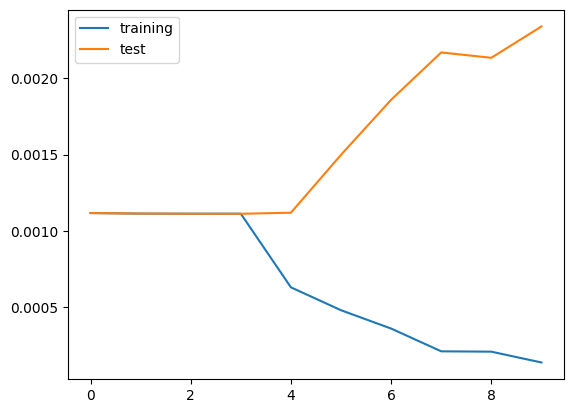

In [36]:
import matplotlib.pyplot as plt

plt.plot(list_training_loss, label='training')
plt.plot(list_test_loss, label='test')
plt.legend()
plt.show()